# End-to-end  Multi-class Dog Breed Classifier

Using tensorflow 2.0 and tensorflow hub.

## 1. Problem

Identifying the breed of a dog by the given image.

## 2. Data

The data is from Kaggle's dog breed identification competition.
## 3. Evaluation

The evaluation file with prediction probabilities for each dog breed of each test image.
## 4. Features

Some info about the data:
* We are dealing with unstructured data(images)
* We will use deep learning/transfer learning
* There are about 120 different breeds of dogs
* There are over 10k images in the trainning and test sets.

## Getting Workspace ready

In [ ]:
# Import TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
print("TF: ", tf.__version__)
print("TF hub: ", hub.__version__)

# Check for GPU
print("GPU", "avaliable" if tf.config.list_physical_devices("GPU") else "not avaliable" )

TF:  2.2.0
TF hub:  0.8.0
GPU avaliable


## Getting data ready (turning images into tensors)

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/colab-data/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     78f55447d9df48913f4d96965a695930  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


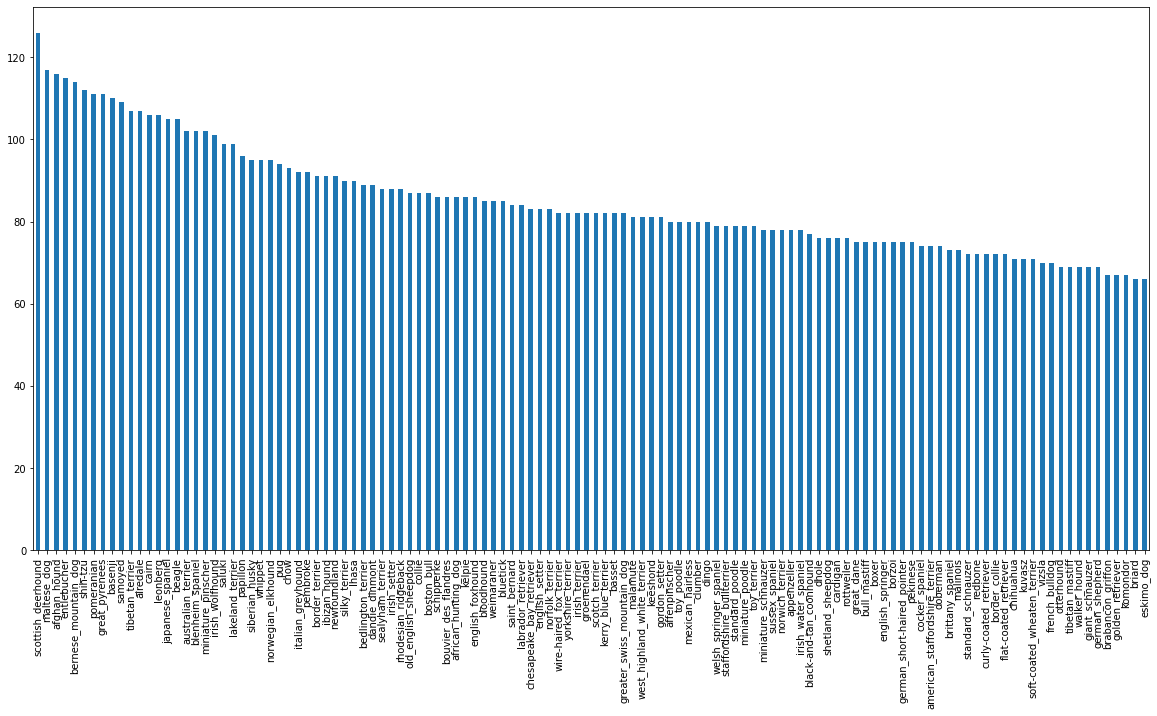

In [ ]:
# Images per class
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

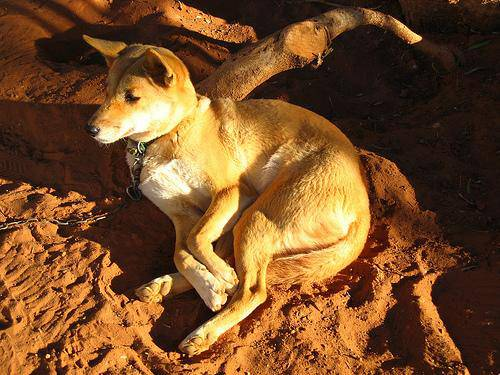

In [ ]:
from IPython.display import Image
Image("drive/My Drive/colab-data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images and their labels

In [ ]:
# Create path names from image IDs
filenames = ["drive/My Drive/colab-data/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['drive/My Drive/colab-data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/colab-data/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check filenames matches with train files
import os
if len(os.listdir("drive/My Drive/colab-data/dog-breed-identification/train/")) == len(filenames):
  print("Matches")
else:
  print("does not match")

Matches


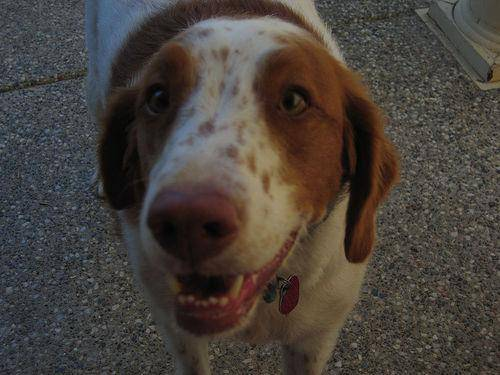

In [ ]:
Image(filenames[77])

In [ ]:
labels_csv["breed"][7777]

'weimaraner'

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
if len(labels) == len(filenames):
  print("matched")

matched


In [ ]:
# find the unique labels
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating validation set

In [ ]:
# Setup X and y variables

X = filenames
y = boolean_labels

In [ ]:
len(X), len(y)

(10222, 10222)

We will start experimenting with 1k images and increase as needed.

In [ ]:
# Set number of images for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10022, step:100}

In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                      test_size=0.2,
                                                      random_state=42)
len(X_train), len(X_valid), len(y_train), len(y_valid)

(800, 200, 800, 200)

In [ ]:
X_train[:2], y_train[:2]

(['drive/My Drive/colab-data/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/colab-data/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         

## Preprocessing images into Tensors

#### The preprocessing function will do the following
* Take an image filepath as input
* Use Tensorflow to read the file and save it to a variable `image`
* Turn our `image` into Tensrs
* Normalize our `image` i.e turn 0-255 to 0-1 values
* Resize the `image` ro be a shape of (224, 224)
* Return our processed `image`

In [ ]:
# Convert an image to a NumPy
from matplotlib.pyplot import imread
image = imread(filenames[777])
image.shape

(333, 441, 3)

In [ ]:
# Turm image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 441, 3), dtype=uint8, numpy=
array([[[ 13,  13,  15],
        [ 12,  12,  14],
        [ 11,  11,  13],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 15,  15,  17],
        [ 14,  14,  16],
        [ 12,  12,  14],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)>

In [259]:
# Define image size
IMG_SIZE = 224

# Define the preprocess function
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns it into a Tensor
  """
  # Read an image
  image = tf.io.read_file(image_path)
  # Turn the image into Tensor with rgb
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  # Normalization
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the shape to (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

In [ ]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the assiciated label,
  processses the image and returns a tuple if (image, label)
  """
  image = process_image(image_path)

  return image, label

Turning all data (`X` and `y`) into batches

In [261]:
# Define the batch size = 32
BATCH_SIZE = 32

# Function to create data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of images (X) and labels (y) pairs.
  Shuffles if trainning data but not of validation data
  Also accepts test data (they don't have labels)
  """
  # test data
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepath no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # validation dataset
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                               tf.constant(y))) # labels
    # Shuffling
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [ ]:
# Creating train and validation data batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

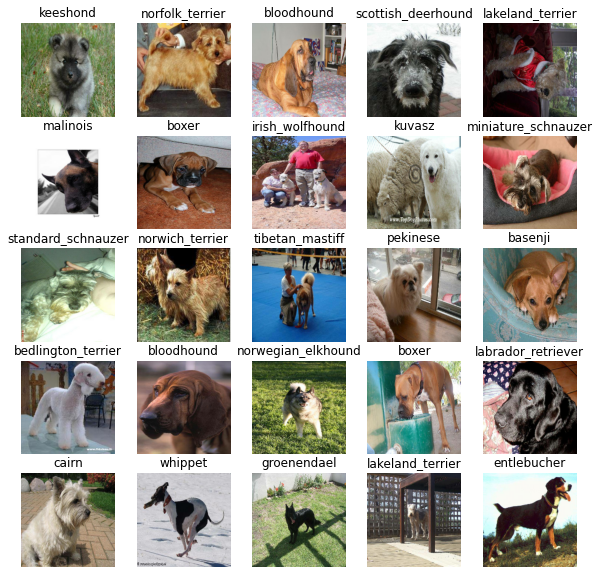

In [ ]:
# trainning set images
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

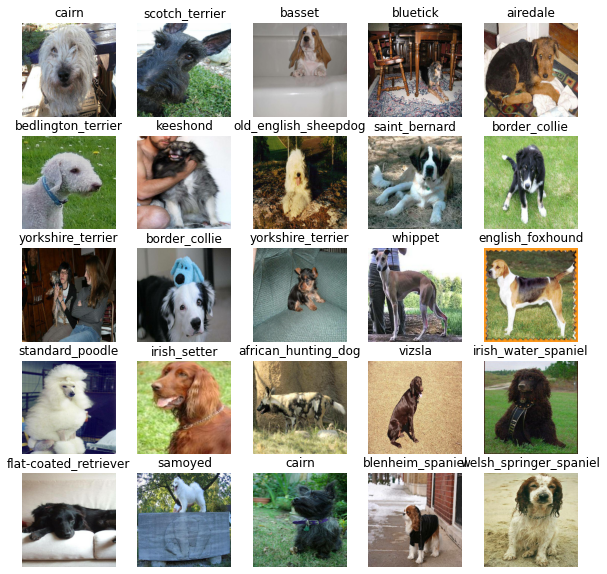

In [ ]:
# validation set images 
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

## Create and trainning model

We need to define these
* The input shape (image shpae)
* The output shape (image labels)
* The URL of the model

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Keras Deep Learning Model

Function will:
* Take the input shape, output shape and the model
* Defines the layers in the Keras model in sequential fashion
* Compiles the model
* Builds th model
* Returns the model

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (i/p)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (o/p)
  ])
  # Compile
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  # Build
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

* Tensorboard: for tracking the model progress 
* For early stopping which prevents model from trainning for too long

### Tensorboard Callback

In [ ]:
# Load tensorBoard notebook extension
%load_ext tensorboard


In [160]:
import datetime

# Create function to build tensorboard callback
def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/My Drive/colab-data/dog-breed-identification/logs",
                        # Make logs to get tracked when we run 
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callbacks

In [161]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Trainning a model (on a subset)

In [154]:
NUM_EPOCHS = 100 #@param {type: "slider", min:10, max:100}


Function to train a model

* Create model using `create_model()`
* Setup a TensorBoard callback
* Call the `fit()` function and pass pur trainning data, validation data, number of epochs to train and the callbacks
* Return the model

In [164]:
# Build the function 
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create model
  model = create_model()
  # Create a new TensorBoard 
  tensorboard = create_tensorboard_callback()
  # Fit the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [166]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 2/25 [=>............................] - ETA: 7s - loss: 5.8299 - accuracy: 0.0000e+00WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.242344). Check your callbacks.


25/25 [==============================] - 7s 298ms/step - loss: 4.5583 - accuracy: 0.0975 - val_loss: 3.3524 - val_accuracy: 0.2850
Epoch 2/100
25/25 [==============================] - 7s 268ms/step - loss: 1.5884 - accuracy: 0.7000 - val_loss: 2.0798 - val_accuracy: 0.5550
Epoch 3/100
25/25 [==============================] - 7s 261ms/step - loss: 0.5468 - accuracy: 0.9388 - val_loss: 1.6308 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 7s 261ms/step - loss: 0.2467 - accuracy: 0.9887 - val_loss: 1.4788 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 7s 261ms/step - loss: 0.1429 - accuracy: 0.9975 - val_loss: 1.3772 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 6s 258ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.3339 - val_accuracy: 0.6600
Epoch 7/100
25/25 [==============================] - 7s 261ms/step - loss: 0.0743 - accuracy: 1.0000 - val_loss: 1.3064 - val_accuracy: 0.6650
Epoch 8/100

### Checking the tensorBoard logs


In [168]:
%tensorboard --logdir /content/drive/My\ Drive/colab-data/dog-breed-identification/logs/

Reusing TensorBoard on port 6006 (pid 7315), started 0:04:37 ago. (Use '!kill 7315' to kill it.)

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [178]:
# Make predictions on validation set
predictions = model.predict(valid_data, verbose=1)
predictions

7/7 [==============================] - 1s 164ms/step


array([[5.33245597e-03, 2.02956187e-04, 4.62575525e-04, ...,
        1.73894718e-04, 3.26792884e-04, 2.97071296e-03],
       [2.06501014e-03, 1.55864211e-04, 5.91842737e-03, ...,
        1.55209622e-04, 1.58907205e-03, 3.69120593e-04],
       [1.54674417e-05, 1.13884620e-04, 5.81698478e-05, ...,
        1.94711683e-04, 6.46230183e-05, 6.26851281e-04],
       ...,
       [2.01484199e-05, 6.58538411e-05, 2.07336809e-04, ...,
        1.06031021e-05, 1.14455099e-04, 9.36778542e-06],
       [2.76961550e-03, 8.84210240e-05, 1.27731386e-04, ...,
        1.04941486e-04, 1.15163733e-04, 7.37226382e-03],
       [6.60069985e-04, 1.87824233e-04, 3.44812870e-04, ...,
        4.38487018e-03, 2.15298613e-03, 6.16920064e-04]], dtype=float32)

In [179]:
# First prediction
index = 100
print(predictions[index])
print(f"Max value: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.47118888e-04 1.37232901e-05 1.48797029e-04 5.98797078e-06
 3.32155963e-04 1.16256386e-04 1.32935365e-05 9.93706199e-05
 6.73436734e-04 1.19580841e-02 3.36440535e-05 6.42935629e-04
 1.09583302e-03 7.03991027e-05 3.27235818e-01 3.21517291e-05
 3.88453518e-05 7.29860691e-03 1.17913623e-06 1.54364880e-05
 8.65365728e-05 3.25638626e-04 6.61410304e-05 2.03344651e-04
 2.78509152e-03 1.89590338e-03 1.69473674e-06 4.29809324e-06
 3.19054633e-01 1.16544164e-04 1.39949072e-04 6.70163194e-04
 7.91988045e-04 8.69110136e-06 1.37811498e-04 7.33761917e-05
 4.31929016e-04 8.34809383e-04 3.30718540e-05 1.32082007e-03
 5.87590388e-04 6.61345621e-06 8.62923043e-05 4.55229223e-04
 7.79349497e-03 6.67852919e-06 4.63990262e-04 7.13651767e-04
 1.27340099e-04 3.46031925e-03 1.50859138e-04 7.73899956e-05
 1.76003319e-03 6.98731092e-05 1.01884561e-05 1.96918450e-06
 5.71993133e-03 7.99952075e-04 1.91289611e-04 7.82914940e-05
 5.84996224e-06 7.70830593e-05 1.55573198e-05 1.20126198e-04
 3.51025687e-06 3.887893

In [180]:
# Turn prediction probabilities into their respectiv labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[1])
pred_label

'scotch_terrier'

In [196]:
# Function to unbatch a batch dataset
def unbatchify(data):
  """
  Turns a batch dataset and returns seperate arrays for images and labels
  """
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify
valid_images, valid_labels = unbatchify(valid_data)
valid_images[0], valid_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [189]:
get_pred_label(valid_labels[0])

'affenpinscher'

### Visualization

In [203]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  Views the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
      color = "blue"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

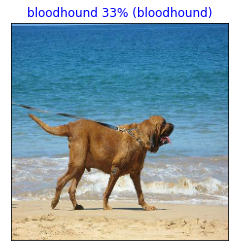

In [209]:
plot_pred(prediction_probabilities=predictions,
          labels=valid_labels,
          images=valid_images,
          n=100)

Model to view our top 10 predicitons

In [234]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  # Get predicted label
  pred_label = get_pred_label(pred_prob)
  # Find top 10
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
            labels = top_10_pred_labels,
            rotation="vertical")
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

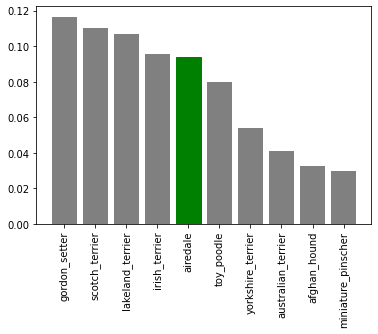

In [235]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=valid_labels,
               n=69)

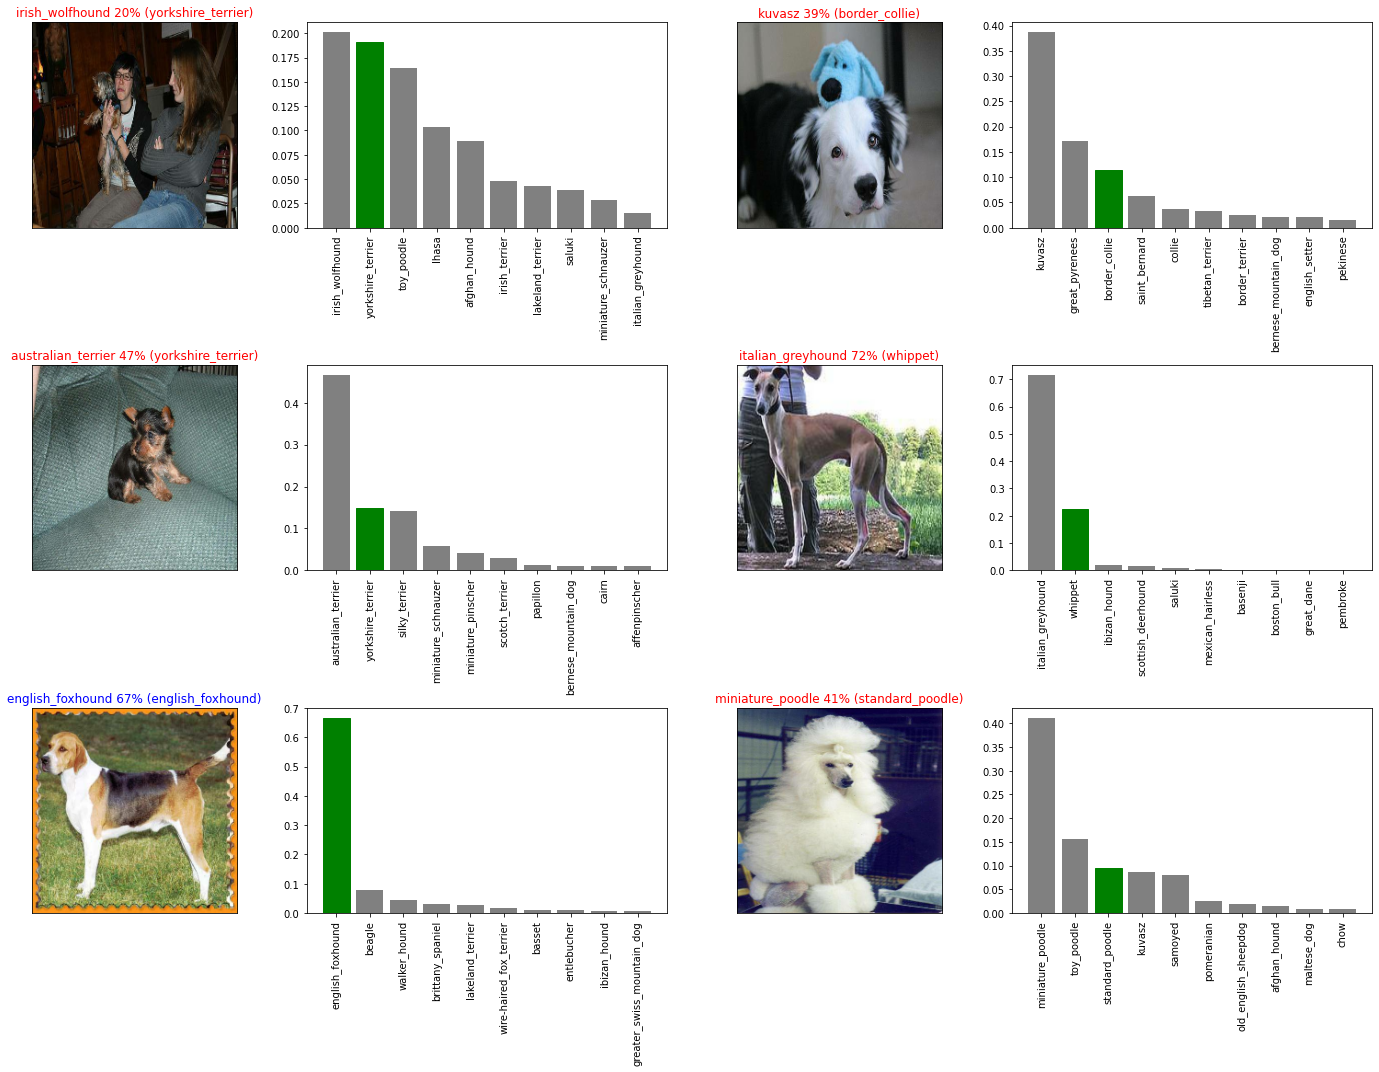

In [239]:
# Combining predicitons and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=valid_labels,
            images=valid_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=valid_labels,
                n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

## Saving model

In [240]:
# function to save model
def save_model(model, suffix=None):
  """
  Saves a given model
  """
  modeldir = os.path.join("/content/drive/My Drive/colab-data/dog-breed-identification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}....")
  model.save(model_path)
  return model_path

In [241]:
# Function to load model
def load_model(model_path):
  """
  Loads a saved model from a saved path
  """
  print(f"Loading saved model from {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model                                

In [242]:
# Save model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-092742-1000-images-mobilenetv2-Adam.h5....


'/content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-092742-1000-images-mobilenetv2-Adam.h5'

In [243]:
# Load trained model
loaded_1000_image_model = load_model("/content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-092742-1000-images-mobilenetv2-Adam.h5")

Loading saved model from /content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-092742-1000-images-mobilenetv2-Adam.h5


In [244]:
# Evaluate the pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 147ms/step - loss: 1.2809 - accuracy: 0.6650


[1.2809362411499023, 0.6650000214576721]

In [245]:
# Evaluated saved model
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 1s 145ms/step - loss: 1.2809 - accuracy: 0.6650


[1.2809362411499023, 0.6650000214576721]

## Train model on full data set

In [246]:
len(X), len(y)

(10222, 10222)

In [247]:
# Create a data batch with full dataet
full_data = create_data_batches(X, y)

Creating training data batches...


In [248]:
# Create a model for all data
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [251]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# no validation data here, so no monitoring
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [252]:
# Fitting the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 3670s 11s/step - loss: 1.3457 - accuracy: 0.6700
Epoch 2/100
320/320 [==============================] - 63s 196ms/step - loss: 0.4002 - accuracy: 0.8858
Epoch 3/100
320/320 [==============================] - 61s 191ms/step - loss: 0.2382 - accuracy: 0.9370
Epoch 4/100
320/320 [==============================] - 61s 191ms/step - loss: 0.1564 - accuracy: 0.9624
Epoch 5/100
320/320 [==============================] - 62s 192ms/step - loss: 0.1065 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 62s 192ms/step - loss: 0.0770 - accuracy: 0.9879
Epoch 7/100
320/320 [==============================] - 63s 198ms/step - loss: 0.0584 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 62s 193ms/step - loss: 0.0462 - accuracy: 0.9937
Epoch 9/100
320/320 [==============================] - 62s 194ms/step - loss: 0.0395 - accuracy: 0.9951
Epoch 10/100
320/320 [==============================] - 62s 193m

In [253]:
save_model(full_model, suffix="full-image-set")

Saving model to: /content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-110918-full-image-set.h5....


'/content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-110918-full-image-set.h5'

In [254]:
loaded_full_model = load_model("/content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-110918-full-image-set.h5")

Loading saved model from /content/drive/My Drive/colab-data/dog-breed-identification/models/20200625-110918-full-image-set.h5


## Making predictions on the test dataset

* Get the file paths
* Turn filenames into test data batches
* Make predictions

In [265]:
# Load test image filenames
test_path = "/content/drive/My Drive/colab-data/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/colab-data/dog-breed-identification/test/e4e57083c3b68e91760ce6f5fcd0a2f9.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/ca9f2b11a817dbbe6fa9c81a9e8b0108.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/ffb8bceeac5b3f587f67391ad346d454.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/d4bd6bd5b2ed69e650d7e3f633cdffdd.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/df0196ea5d16d1570c1f2b567b975b90.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/e5ba665e01b6927411d60158f28160dd.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/c61d15dc63ce77f31ff59b8a2e4b2b96.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/d18e7f2e252bc32d7f6ad2f717273e2f.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/test/f10241d199251db359961e814733efc5.jpg',
 '/content/drive/My Drive/colab-data/dog-breed

In [266]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [267]:
# Make predictions
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 4149s 13s/step


In [269]:
np.savetxt("/content/drive/My Drive/colab-data/dog-breed-identification/preds_array.csv", test_predictions, delimiter=",")

In [270]:
test_predictions[:10]

array([[1.56492059e-11, 1.09270069e-08, 1.52191679e-11, ...,
        2.11258636e-10, 1.55678699e-11, 5.78342409e-12],
       [1.03113029e-09, 1.06521725e-07, 3.03877584e-07, ...,
        5.80319304e-09, 6.36386677e-09, 1.98921768e-08],
       [8.84194719e-07, 1.17395149e-09, 6.47758025e-09, ...,
        1.45860890e-09, 1.62156011e-09, 1.32238625e-07],
       ...,
       [7.18338171e-08, 3.93070021e-11, 2.34156827e-09, ...,
        2.81278290e-09, 1.24075797e-07, 7.38299832e-06],
       [2.97346702e-07, 4.61113947e-09, 5.36846290e-10, ...,
        2.77657453e-08, 2.33087940e-06, 5.16849605e-06],
       [9.65790208e-12, 1.47696161e-10, 8.65023608e-09, ...,
        6.79762661e-06, 1.52722723e-09, 6.21085572e-10]], dtype=float32)

In [272]:
test_predictions.shape

(10357, 120)

### Preparing test dataset predictions for Kaggle

In [273]:
# Create pandas df
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [276]:
# Append test image id to preds_df
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df[list(unique_breeds)] = test_predictions

In [278]:
preds_df.head()

id  ... yorkshire_terrier
0  e4e57083c3b68e91760ce6f5fcd0a2f9  ...       5.78342e-12
1  ca9f2b11a817dbbe6fa9c81a9e8b0108  ...       1.98922e-08
2  ffb8bceeac5b3f587f67391ad346d454  ...       1.32239e-07
3  d4bd6bd5b2ed69e650d7e3f633cdffdd  ...       5.80512e-09
4  df0196ea5d16d1570c1f2b567b975b90  ...        4.8692e-08

[5 rows x 121 columns]

In [279]:
# Exporting
preds_df.to_csv("/content/drive/My Drive/colab-data/dog-breed-identification/submission1.csv", index=False)

## Making predictions on custom images

* Get the filepaths of our own images
* Turn filepaths into data batches
* Pass the custom image data batch into our model
* Convert the prediction o/p probability into prediction labels
* Compare the predicted labels with the custom images

In [280]:
# Getting the paths
custom_path = "/content/drive/My Drive/colab-data/dog-breed-identification/custom-images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [281]:
custom_image_paths

['/content/drive/My Drive/colab-data/dog-breed-identification/custom-images/1800x1200_dog_cool_summer_other.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/custom-images/cute-puppy-body-image.jpg',
 '/content/drive/My Drive/colab-data/dog-breed-identification/custom-images/dog-2785074__340.jpg']

In [282]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches....


In [283]:
# Make predictions
custom_preds = loaded_full_model.predict(custom_data)

In [284]:
custom_preds.shape

(3, 120)

In [286]:
# Custom image prediction label
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['staffordshire_bullterrier', 'shih-tzu', 'cocker_spaniel']

In [287]:
# Unbatchify custom images
custom_images = []
# Loop thriugh unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

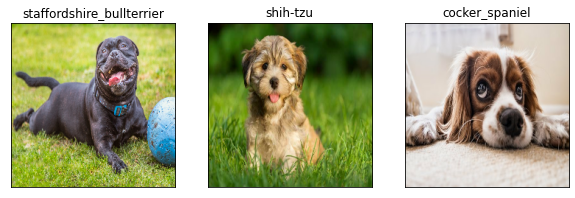

In [288]:
# Check custom images prediction
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)